## Regression-理论及其工作原理

什么是协方差？
https://blog.csdn.net/wuhzossibility/article/details/8087863

In [1]:
from statistics import mean #容易获取列表均值
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style

style.use('ggplot')

xs = np.array([1,2,3,4,5],dtype = np.float64)
ys = np.array([5,4,6,5,6],dtype = np.float64)

In [2]:
def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys))/((mean(xs)**2)-mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m,b
m,b = best_fit_slope_and_intercept(xs,ys)
print(m,b)

0.3 4.3


In [3]:
regression_line = []
for x in xs:
    regression_line.append((m * x) + b)

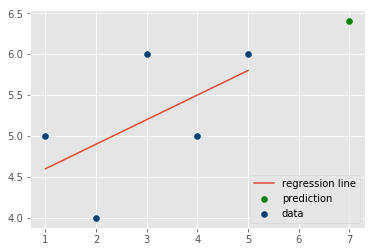

In [4]:
predict_x = 7
predict_y = (m*predict_x)+b

plt.scatter(predict_x,predict_y,color='green',label='prediction')
plt.scatter(xs,ys,color='#003F72',label='data')
plt.plot(xs, regression_line, label='regression line')
plt.legend(loc=4)
plt.show()

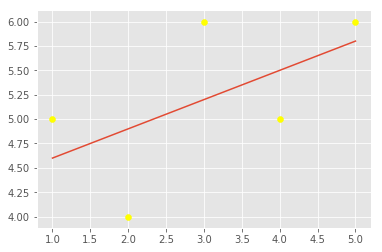

In [5]:
plt.scatter(xs,ys,color='yellow')
plt.plot(xs, regression_line)
plt.show()

R平方 判定系数 :计算 R 平方值，或者叫做判定系数，使其尽量接近 1。
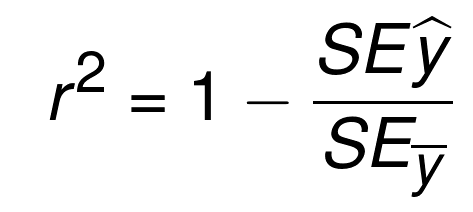
1. y_hat = x * m + b
2. r_sq = 1 - np.sum((y - y_hat)^2) / np.sum((y - y.mean())^2)

1. 1 减去(回归直线的平方误差，比上 y 平均直线的平方误差)。 
2. y 平均直线就是数据集中所有 y 值的均值，如果你将其画出来，它是一个水平的直线。
3. 所以，我们计算 y 平均直线，和回归直线的平方误差。这里的目标是识别，与欠拟合的直线相比，数据特征的变化产生了多少误差。
https://www.jianshu.com/p/e6b7a61fd63d

In [ ]:
'''
计算平方误差
'''
def squared_error(ys_orig, ys_line):
    return sum((ys_line - y_orig) * (ys_line - y_orig))

In [ ]:
'''
计算R平方
'''
def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in y_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean =  squared_error(ys_orig, ys_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)

In [6]:
'''
 完整计算R平方
 存在问题：这是个很低的值，所以根据这个度量，我们的最佳拟合直线并不是很好
 这里的 R 平方是个很好的度量手段吗？可能取决于我们的目标。多数情况下，如果我们关心准确预测未来的值，R 平方的确很有用。
 如果你对预测动机或者趋势感兴趣，我们的最佳拟合直线实际上已经很好了。
 R 平方不应该如此重要。看一看我们实际的数据集，我们被一个较低的数值卡住了。
'''
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')

xs = np.array([1,2,3,4,5], dtype=np.float64)
ys = np.array([5,4,6,5,6], dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    b = mean(ys) - m*mean(xs)
    return m, b

def squared_error(ys_orig,ys_line):
    return sum((ys_line - ys_orig) * (ys_line - ys_orig))

def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]
    squared_error_regr = squared_error(ys_orig, ys_line)
    squared_error_y_mean = squared_error(ys_orig, y_mean_line)
    return 1 - (squared_error_regr/squared_error_y_mean)
    
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]

r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

0.321428571429


#### 为测试创建样例数据集

In [ ]:
'''
hm: 生成多少个数据点
variance: 决定每个数据点和之前的数据点相比，有多大变化。变化越大，就越不紧密。
step: 每个点距离均值有多远，默认为 2。
correlation：可以为False、pos或者neg，决定不相关、正相关和负相关。
'''
def create_datasets(hm, variance, step=2, correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.ranfrange(-variance, variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step
    xs = [i for in range(len(ys))]
    return np.array(xs, dtype=np.float64), np.array(ys, dtype=np.float64)

1328.67298311
1371.9
0.0315088686388


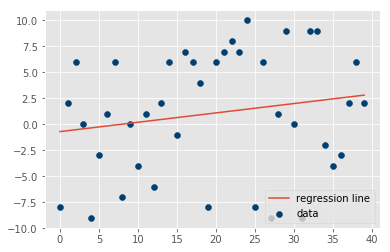

In [7]:
from statistics import mean
import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')


def create_dataset(hm,variance,step=2,correlation=False):
    val = 1
    ys = []
    for i in range(hm):
        y = val + random.randrange(-variance,variance)
        ys.append(y)
        if correlation and correlation == 'pos':
            val+=step
        elif correlation and correlation == 'neg':
            val-=step

    xs = [i for i in range(len(ys))]
    
    return np.array(xs, dtype=np.float64),np.array(ys,dtype=np.float64)

def best_fit_slope_and_intercept(xs,ys):
    m = (((mean(xs)*mean(ys)) - mean(xs*ys)) /
         ((mean(xs)*mean(xs)) - mean(xs*xs)))
    
    b = mean(ys) - m*mean(xs)

    return m, b


def coefficient_of_determination(ys_orig,ys_line):
    y_mean_line = [mean(ys_orig) for y in ys_orig]

    squared_error_regr = sum((ys_line - ys_orig) * (ys_line - ys_orig))
    squared_error_y_mean = sum((y_mean_line - ys_orig) * (y_mean_line - ys_orig))

    print(squared_error_regr)
    print(squared_error_y_mean)

    r_squared = 1 - (squared_error_regr/squared_error_y_mean)

    return r_squared


# xs, ys = create_dataset(40,40,2,correlation='pos')
# xs, ys = create_dataset(40,10,2,correlation='neg')
xs, ys = create_dataset(40,10,2,correlation=False)
m, b = best_fit_slope_and_intercept(xs,ys)
regression_line = [(m*x)+b for x in xs]
r_squared = coefficient_of_determination(ys,regression_line)
print(r_squared)

plt.scatter(xs,ys,color='#003F72', label = 'data')
plt.plot(xs, regression_line, label = 'regression line')
plt.legend(loc=4)
plt.show()

结果证实：变化越小 R 值和判定系数越高，变化越大 R 值越低。如果是不相关呢？应该很低，接近于 0，除非我们的随机数排列实际上有相关性